Episode length:  200  | Total reward:  -200.0


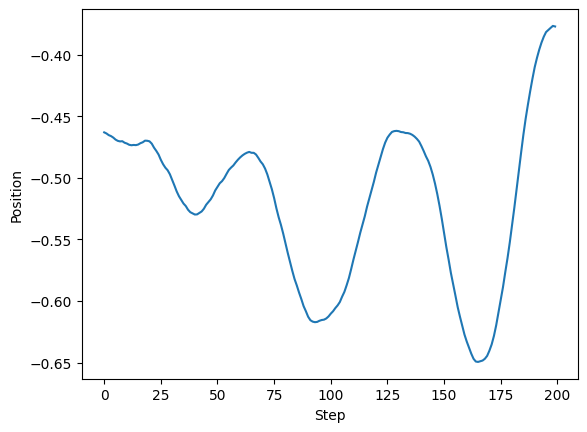

In [9]:
env = gym.make("MountainCar-v0")
positions = []
rewards = []
obs, info = env.reset(seed=123)

done = False
total_r = 0
while not done:
    action = env.action_space.sample()
    obs, reward, terminated, truncated, info = env.step(action)
    done = terminated or truncated
    positions.append(obs[0])
    rewards.append(reward)
    total_r += reward

env.close()

print("Episode length: ", len(rewards), " | Total reward: ", total_r)

plt.figure()
plt.plot(positions)
plt.xlabel("Step")
plt.ylabel("Position")
plt.show()

In [ ]:
from gymnasium.wrappers import RecordVideo

log_dir = "./mountaincar_logs"
video_dir = "./mountaincar_videos"
os.makedirs(log_dir, exist_ok=True)
os.makedirs(video_dir, exist_ok=True)

def make_env(seed=0):
    e = gym.make("MountainCar-v0", render_mode = None)
    e = Monitor(e, filename = os.path.join(log_dir, "monitor.csv"))
    return e

def make_video_env(seed=123):
    e = gym.make("MountainCar-v0", render_mode = "rgb_array")
    e = RecordVideo(e, video_folder = video_dir, episode_trigger = lambda ep : True)
    return e

In [11]:
class SaveBest(BaseCallback):
    def __init__(self, check_freq, log_dir, verbose=1):
        super().__init__(verbose)
        self.check_freq = check_freq
        self.log_dir = log_dir
        self.save_path = os.path.join(log_dir, "best_model")
        os.makedirs(self.save_path, exist_ok = True)
        self.best_mean_reward = -np.inf